Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


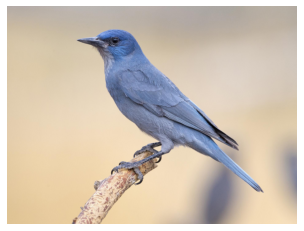

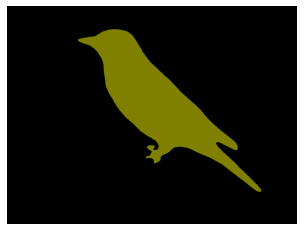

In [9]:
import numpy as np
#from PIL import Image
import matplotlib.pyplot as plt
import torch
import time
import torchvision.transforms as T
from Segmentation import segment
from Time_Cal import infer_time
from Model_Load import load_model
import os
import json

def main():
    dlab = load_model()

    segment(dlab, 'Images/bird.png')

    avg_over = 100

    dlab_infer_time_list_cpu = [infer_time(dlab, dev='cpu') for _ in range(avg_over)]
    dlab_infer_time_avg_cpu = sum(dlab_infer_time_list_cpu) / avg_over
    #print ('The Average Inference time on DeepLab is: {:.2f}s'.format(dlab_infer_time_avg_cpu))


    avg_over = 100

    dlab_infer_time_list_gpu = [infer_time(dlab) for _ in range(avg_over)]
    dlab_infer_time_avg_gpu = sum(dlab_infer_time_list_gpu) / avg_over

#    print ('The Average Inference time on DeepLab is: {:.3f}s'.format(dlab_infer_time_avg_gpu))
    
    if not os.path.exists('Results'):
        os.makedirs('Results')
    
    dict_vals = {'Infer_Time_CPU': dlab_infer_time_avg_cpu,
                 'Infer_Time_GPU': dlab_infer_time_avg_gpu
                 }

    json_dump = json.dumps(dict_vals)
    f = open("Results/Result_Inference.json", "w")
    f.write(json_dump)
    f.close()

#print(f"Successful!! Files stored")
    
if __name__ == "__main__":
    main()